In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


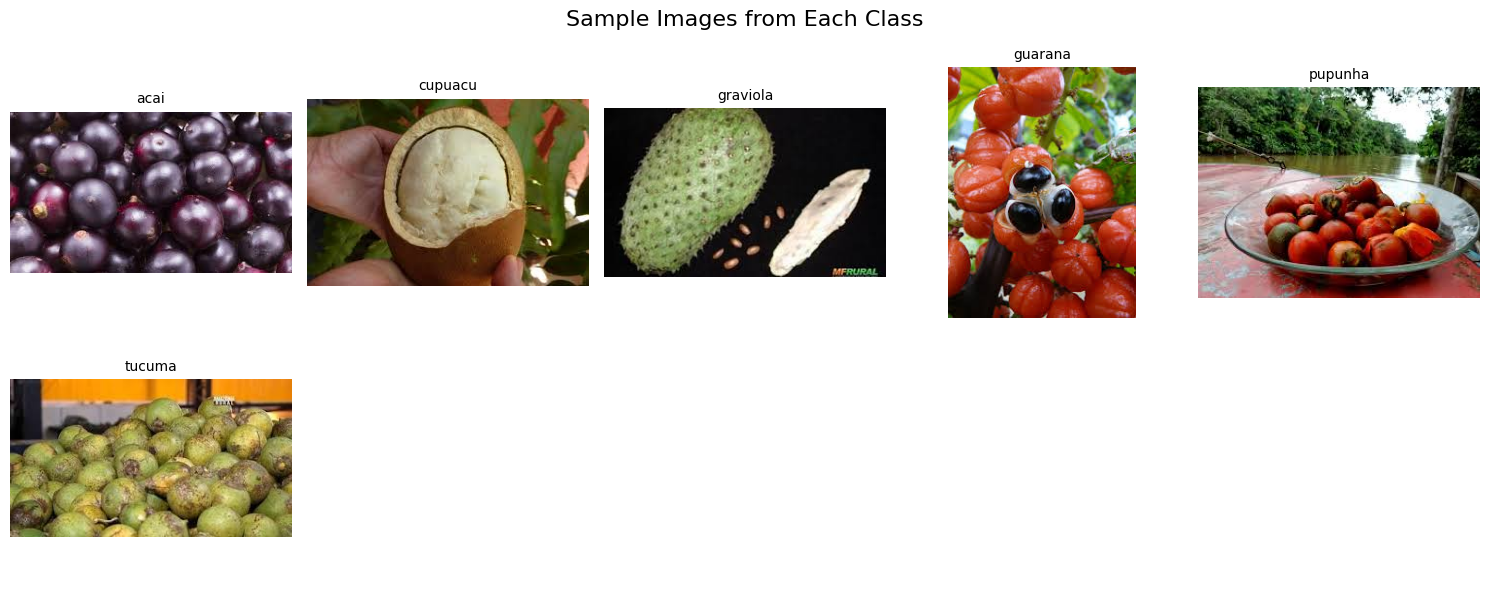

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Sirish Tandukar.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.1140 - loss: 1.8164
Epoch 1: val_loss improved from inf to 1.28786, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1202 - loss: 1.8215 - val_accuracy: 0.6667 - val_loss: 1.2879
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.3356 - loss: 1.8152
Epoch 2: val_loss improved from 1.28786 to 1.03890, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.3316 - loss: 1.8143 - val_accuracy: 0.8333 - val_loss: 1.0389
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.2523 - loss: 1.5620
Epoch 3: val_loss did not improve from 1.03890
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 617ms/step - accuracy: 0.2691 - loss: 1.5526 - val_accuracy: 0.0000e+00 - val_loss: 2.1202
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.3032 - loss: 1.4281
Epoch 4: val_loss did not improve from 1.03890
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.3142 - loss: 1.4131 - val_accuracy: 0.7222 - val_loss: 1.0987
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.6181 - loss: 0.9725
Epoch 5: val_loss did not improve from 1.03890
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - accuracy: 0.6302 - loss: 0.9666 - val_accuracy: 0.6667 - val_loss: 1.3879
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.6736 - loss: 0.9885
Epoch 6: val_loss improved from 1.03890 to 0.84742, sav

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6823 - loss: 0.9806 - val_accuracy: 0.7778 - val_loss: 0.8474
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9705 - loss: 0.4755
Epoch 7: val_loss improved from 0.84742 to 0.74559, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 661ms/step - accuracy: 0.9674 - loss: 0.4766 - val_accuracy: 0.7222 - val_loss: 0.7456
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.9705 - loss: 0.3398
Epoch 8: val_loss improved from 0.74559 to 0.55331, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 709ms/step - accuracy: 0.9674 - loss: 0.3419 - val_accuracy: 0.8333 - val_loss: 0.5533
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9595 - loss: 0.2268
Epoch 9: val_loss improved from 0.55331 to 0.51018, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 688ms/step - accuracy: 0.9627 - loss: 0.2240 - val_accuracy: 0.7778 - val_loss: 0.5102
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 1.0000 - loss: 0.1314
Epoch 10: val_loss did not improve from 0.51018
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step - accuracy: 1.0000 - loss: 0.1282 - val_accuracy: 0.8333 - val_loss: 0.5259
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 1.0000 - loss: 0.0667
Epoch 11: val_loss improved from 0.51018 to 0.36246, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0645 - val_accuracy: 0.8333 - val_loss: 0.3625
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 1.0000 - loss: 0.0292
Epoch 12: val_loss did not improve from 0.36246
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 0.8333 - val_loss: 0.3961
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 1.0000 - loss: 0.0173
Epoch 13: val_loss did not improve from 0.36246
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 648ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.8333 - val_loss: 0.3854
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 1.0000 - loss: 0.0098
Epoch 14: val_loss did not improve from 0.36246
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.8333 - val_loss: 0.3929
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 15: val_loss did not improve from 0.36246
3/3 ━━━

In [14]:
test_dir = '/content/drive/MyDrive/AI and ML/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7000 - loss: 137.6273
Test Loss: 137.62730407714844
Test Accuracy: 0.699999988079071


In [9]:

model.save('sirish_tanduakr_model.h5')
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.13      0.16        30
           1       0.68      0.19      0.30        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.17       120
   macro avg       0.15      0.05      0.08       120
weighted avg       0.56      0.17      0.26       120

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 1.0000 - loss: 0.0293
Epoch 1: val_loss did not improve from 0.36246
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 768ms/step - accuracy: 1.0000 - loss: 0.0292 - val_accuracy: 0.8333 - val_loss: 0.3663
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 1.0000 - loss: 0.0263
Epoch 2: val_loss did not improve from 0.36246
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 0.8333 - val_loss: 0.4027
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 1.0000 - loss: 0.0207
Epoch 3: val_loss improved from 0.36246 to 0.35374, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 0.8333 - val_loss: 0.3537
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 1.0000 - loss: 0.0135
Epoch 4: val_loss improved from 0.35374 to 0.34236, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 666ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.8333 - val_loss: 0.3424
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 5: val_loss did not improve from 0.34236
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 850ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.8333 - val_loss: 0.4056
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 1.0000 - loss: 0.0078
Epoch 6: val_loss did not improve from 0.34236
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 950ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.8333 - val_loss: 0.4321
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 7: val_loss did not improve from 0.34236
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 564ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8333 - val_loss: 0.3693
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 1.0000 - loss: 0.0048
Epoch 8: val_loss did not improve from 0.34236
3/3 ━━━━━━━━

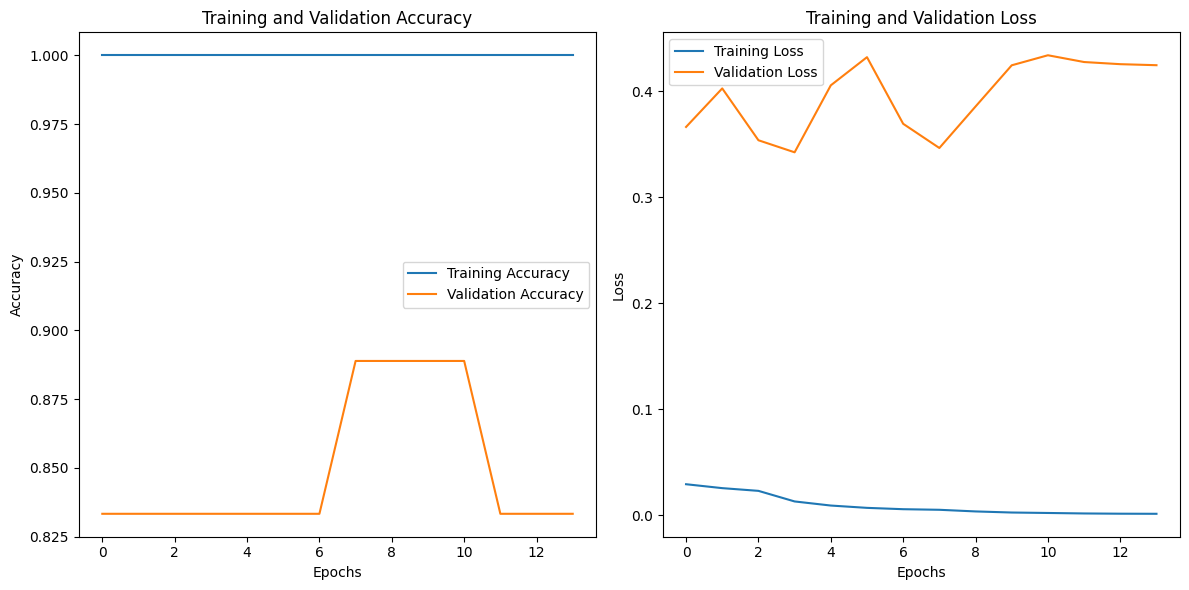

Model saved as 'dipendra_timalsina_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('siriah_tandukar_model.h5')
print("Model saved as 'dipendra_timalsina_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data used for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2349 - loss: 2.6508 - val_accuracy: 0.2444 - val_loss: 1.6645
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 783ms/step - accuracy: 0.5015 - loss: 1.6744 - val_accuracy: 0.4000 - val_loss: 1.6052
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 997ms/step - accuracy: 0.5306 - loss: 1.5287 - val_accuracy: 0.3333 - val_loss: 1.6207
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7327 - loss: 1.1144 - val_accuracy: 0.3222 - val_loss: 1.6179
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5049 - loss: 1.4234 - val_accuracy: 0.2111 - val_loss: 1.6579
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step - accuracy: 0.6211 - loss: 0.9626 - val_accuracy: 0.1667 - val_loss: 1.7504
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 686ms/step - accuracy: 0.6612 - loss: 1.0309 - val_accuracy: 0.1667 - val_loss: 1.8672
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 0.6059 - loss: 1.0824 - val_accuracy: 0.1667 - val_loss: 2.0099


## Task 2: Transfer Learning using VGG16

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

NameError: name 'train_datagen' is not defined

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define train_datagen and val_datagen here
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 135s 53s/step - accuracy: 0.1182 - loss: 1.9146 - val_accuracy: 0.4111 - val_loss: 1.6459
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 143s 56s/step - accuracy: 0.4239 - loss: 1.6316 - val_accuracy: 0.5000 - val_loss: 1.4753
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 62s/step - accuracy: 0.4593 - loss: 1.4922 - val_accuracy: 0.6333 - val_loss: 1.2499
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 126s 51s/step - accuracy: 0.5891 - loss: 1.3470 - val_accuracy: 0.7000 - val_loss: 1.1528
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 63s/step - accuracy: 0.6383 - loss: 1.2405 - val_accuracy: 0.6778 - val_loss: 1.0287


In [4]:
# Evaluate and Classification Report
import numpy as np
from sklearn.metrics import classification_report

# Predict and report
Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 22s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.11      0.07      0.08        15
     cupuacu       0.07      0.07      0.07        15
    graviola       0.14      0.13      0.14        15
     guarana       0.21      0.33      0.26        15
     pupunha       0.50      0.13      0.21        15
      tucuma       0.28      0.47      0.35        15

    accuracy                           0.20        90
   macro avg       0.22      0.20      0.18        90
weighted avg       0.22      0.20      0.18        90

